Allyson Busch

Winter 2019, Bellevue University

# Fraud Detection: Credit Card Data

This project aims to create a fraud detection machine learning model that can identify fraudulent charges from normal charges on a credit card account. The dataset has been provided by Kaggle and consists of actual transactions that have been made anonymous. To start the project, I am loading the dataset and the packages that will be utilized during the project. 

In [1]:
#libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pylab import rcParams

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]

import plotly.plotly as py
import plotly.graph_objs as go 
import plotly
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot

C:\Users\allys\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [2]:
#importing dataset
data = pd.read_csv('creditcard.csv', sep=',')
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [5]:
data.shape

(284807, 31)

In [6]:
data.isnull().values.any()

False

It appears that the data imported correctly, and that there are no null values in the dataset. Now that we know this, we can move into exploratory data analysis and start to get a feel for the dataset.

## Exploratory Data Analysis

I first want to look into the breakdown of transaction classes of normal and fraudulent. I want to start by creating a graphical representation of the data. 

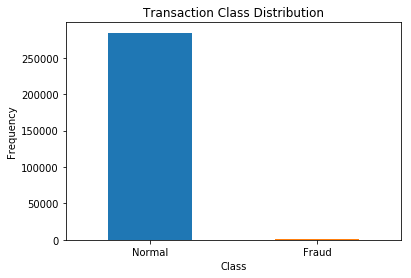

In [7]:
count_class = pd.value_counts(data['Class'], sort = True)
count_class.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

The dataset appears to be very uneven, with far more normal transactions than fraudulent transactions. This is mostly to be expected, as consumers are more likely to have actual transactions than fraudulent transactions or else no one would use credit cards. To continue into the exploration of the data, however, I want to look into what the actual counts of fraudulent and normal transactions there are.

In [8]:
Fraud = data[data['Class']==1]

Normal = data[data['Class']==0]

In [9]:
Fraud.shape

(492, 31)

In [10]:
Normal.shape

(284315, 31)

There are only 492 fraudulent identified transactions in the dataset, with the vast majority of data being considered normal transactions. To understand these transactions further, I want to look into the summary statistics of both the Fraudulent transactions and the Normal transactions.

In [11]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The mean for the fraudulent charges is 122.21, with a standard deviation of 256.68. The minimum charge is 0, and the maximum charge is 2,125.87, with 75% of the data falling below 105.89. The fraudulent charges seem to vary largely, but I am surprised to see the mean so low. Maybe the fraudulent charges are lower than I anticipated in a hope that they won't be detected by users? 

In [12]:
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

The mean for normal charges is 88.29, which is lower than the fraudulent charges. The standard deviation is 250.11, which is very similar to the fraudulent charges. The minimum is 0 and the maximum is 25,691.16 which is a much wider range than the fraudulent charges. 75% of the data falls below 77.05, which is much lower than the fraudulent charges as well. While I previously thought that the Fraudulent charges were low, they seem to be higher than an average charge to the account. 

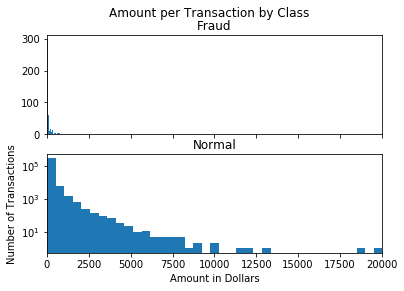

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
f.suptitle("Amount per Transaction by Class")
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title("Fraud")
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title("Normal")
plt.xlabel("Amount in Dollars")
plt.ylabel("Number of Transactions")
plt.xlim((0,20000))
plt.yscale('log')
plt.show();

While this graph doesn't do much to describe what the Fraudulent and Normal transactions look like against each other, it does do well to show what the dataset of Normal transactions looks like. The transactions start small, and decline exponentially as the amount in dollars increases.

Moving forward, I am looking into the time of transaction for each class, fraudulent and normal. We are starting by creating a graph that labels the time in seconds on the x with the amount in y.

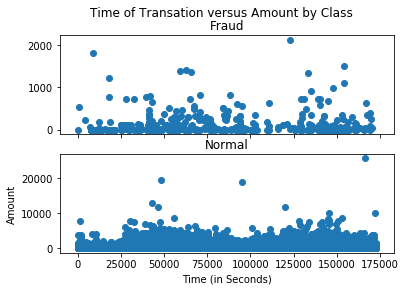

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
f.suptitle('Time of Transation versus Amount by Class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

There doesn't seem to be a significant difference in time of transaction versus the amount of transactions in each category. We can verify this with a correlation analysis between the Time and Class variables for the whole dataset.

In [15]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


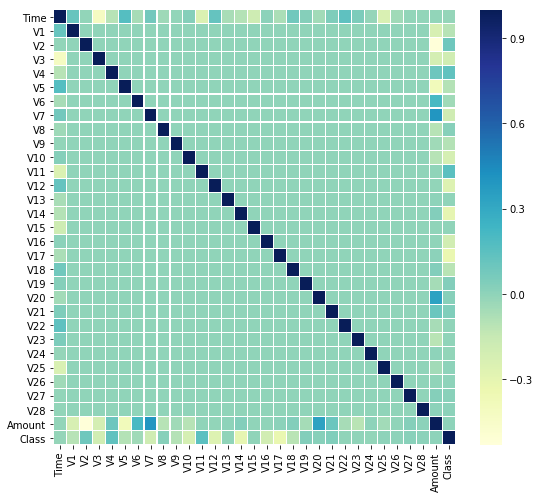

In [16]:
corrmat = data.corr()

f, ax = plt.subplots(figsize = (9,8))
sns.heatmap(corrmat, ax = ax, cmap = "YlGnBu", linewidths = 0.1)

There is a negative correlation of 0.012 between class and time, which is not very significant. While looking at this correlation analysis, there is also not a significant correlation between time and amount, or amount and class for that matter.

## Model Creation

The first model that I am using to build the prediction algorithm is the Isolation Forest Algorithm. This is an unsupervised learning algorithm for anomaly detection that is based on the principal of isolating anomalies instead of profiling normal points. The second model is the Local Outlier Factor (or LOF) Algorithm, which is an unsupervised outlier detection method that computes the local density deviation of a given data point with respect to its neighbors.

We're starting with defining the outlier detection methods.

In [17]:
columns = data.columns.tolist()

#filtering the columns to remove data 

columns = [c for c in columns if c not in ["Class"]]

#storing the variable we are predicting 

target = "Class"

#defining a random state 

state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
X_outliers = state.uniform(low = 0, high = 1, size = (X.shape[0], X.shape[1]))

#print the shapes of x and y 

print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [18]:
#determining the outlier fraction 

Fraud = data[data['Class']==1]
Valid = data[data['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

In [19]:
classifiers = {
    "Isolation Forest": IsolationForest(n_estimators = 100, max_samples = len(X),
                                       contamination = outlier_fraction, random_state = state, verbose = 0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors = 20, algorithm = 'auto', leaf_size = 30, metric = 'minkowski', p=2, metric_params = None, contamination = outlier_fraction),
    "Support Vector Machine": OneClassSVM(kernel = 'rbf', degree = 3, gamma = 0.1, nu = 0.05, max_iter = -1, random_state = state)
}

We are now fitting the model.

In [ ]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    
    #fitting the data and tag outliers
    
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    #reshaping the prediction values to 0 for valid, 1 for fraud
    
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    
    #running the classification metrics
    
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y, y_pred))

C:\Users\allys\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Isolation Forest: 683
Accuracy Score :
0.9976018847851352
Classification Report :
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.31      0.31      0.31       492

avg / total       1.00      1.00      1.00    284807

Local Outlier Factor: 935
Accuracy Score :
0.9967170750718908
Classification Report :
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284315
          1       0.05      0.05      0.05       492

avg / total       1.00      1.00      1.00    284807



The Isolation Forest model was able to detect 683 errors, while the Local Outlier Factor model detected 935 errors. Isolation Forest had an accuracy score of 99.76% while Local Outlier Factor had a score of 99.67%, slightly less than Isolation Forest. When comparing error precision and recall for the first two models, Isolation Forest performed much better than the Local Outlier Factor model. The detection of fraud cases in Isolation Forest is at about 31% while Local Outlier Factor is at just 5%. 

Moving into our next model, the study is working on K-Nearest Neighbors. Since we already split the dataset into attributes and labels for our last model, we can jump ahead to the train/test split.

In [27]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 30].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [29]:
#scaling the features 
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
#training and predicting 

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

#making the predictions on test data 

y_pred = classifier.predict(X_test)

In [31]:
#evaluating 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56863     1]
 [   25    73]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56864
          1       0.99      0.74      0.85        98

avg / total       1.00      1.00      1.00     56962



K-Nearest Neighbors has a 99% precision rate with fraudulent charges, meaning that is was able to have an accuracy of positive predictions at 99%. However, the recall was 74%, meaning it was only able to correctly identify 74% of the positive fraudulent charges. 